# Project: Investigate (No-Show Appointments in Brazil!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> What if it was possible to predict someone for a no-show, medical appointment? By analyzing around 100k medical appointments from Brazil, we can determine what factors influence patients to show up or not show up to their appointments. We will analyze 14 variables, where the variable headers are self-explanatory. The variable that we are most interested in is the No-show variable, where no means they did not show up to an appointment and yes means they did show up. This is also the dependent variable that is dependent upon any of the other independent variables. The scholarship variable could be found with the following link for more information:

In [30]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
## This will give us all information about the data set
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
## This function allows me to get an estimate of how many values are in each category
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [5]:
# check for any missing or null values in dataset 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# check to make sure there is no duplicated data
print(sum(df.duplicated()))

0


In [8]:

# This will allow me to check for the parameters of the Age column so that 
# we can use it for a later exploration
df.Age.max()

115

In [7]:
df.Age.min()
#This is for min age value

-1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [9]:
# Find the row where the Age is -1.
df.query('Age == "-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
# Drop the Age row where it is -1
df = df.drop(df.index[99832])

In [12]:
# confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110525 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110525 non-null  float64
 1   AppointmentID   110525 non-null  int64  
 2   Gender          110525 non-null  object 
 3   ScheduledDay    110525 non-null  object 
 4   AppointmentDay  110525 non-null  object 
 5   Age             110525 non-null  int64  
 6   Neighbourhood   110525 non-null  object 
 7   Scholarship     110525 non-null  int64  
 8   Hipertension    110525 non-null  int64  
 9   Diabetes        110525 non-null  int64  
 10  Alcoholism      110525 non-null  int64  
 11  Handcap         110525 non-null  int64  
 12  SMS_received    110525 non-null  int64  
 13  No-show         110525 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [13]:
# Rename columns so that each column has same format
df.rename(columns={'PatientId':'Patient_id', 'AppointmentID':'Appointment_id','ScheduledDay':'Scheduled_day',
                   'AppointmentDay':'Appointment_day', 'Neighbourhood':'Neighborhood', 'Hipertension':'Hypertension',
                   'Handcap':'Handicap','No-show':'No_show'},
inplace=True)
# inplace true to confirm changes
df.head()

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
dummy = pd.get_dummies(df['Gender'])
# confirm changes
dummy.head()

,F,M
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [15]:
# merge dummy values to original dataframe
df = pd.concat([df, dummy], axis = 1)

# drop 'Gender' column since we no longer need this
df.drop(['Gender'], axis=1, inplace=True)
# confirm changes
df.head()

,Patient_id,Appointment_id,Scheduled_day,Appointment_day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,F,M
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0


In [16]:
"""
This function inputs the new dataframe, cut_points, and labels to create bins for the 'Age' column. We will be needing 
this for a later exploratory graph.
"""
#create binning function
def binning(col, cut_points, labels=None):
    #Define min and max values
    minimum = col.min()
    maximum = col.max()
    
    #create list by adding min and max to cut_points
    break_points = [minimum] + cut_points + [maximum]
    
    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

#Binning age:
cut_points = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["child","teen","young_adult","40s", "50s", "retirement", "70s", "80s", "90s", "100s", "110s"]
df["Age_Bin"] = binning(df["Age"], cut_points, labels)
print(pd.value_counts(df["Age_Bin"], sort=False))

child          18748
teen           13099
young_adult    13783
40s            15052
50s            14420
retirement     15661
70s            11189
80s             5721
90s             2544
100s             301
110s               7
Name: Age_Bin, dtype: int64


<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned the data, we're ready to move on to exploration. We will compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. We must be systematic with our approach and look at one variable at a time, and then follow it up by looking at relationships between variables. To do this, we are going to compare the No-show variable to each of the three variables we are focusing on - scholarship, alcoholism, and SMS received. Then we are going to analyze the relationships between those three variables.

### Question 1: Does the option to receive SMS text messages influence the patient to show up for appointments?

In [17]:
df.groupby(["No_show", "SMS_received"]).size()

No_show  SMS_received
No       0               62508
         1               25698
Yes      0               12535
         1                9784
dtype: int64

**Answer:** There were approximately 3.5/11 patients that received text messages about appointments while 7.5 patients did not. Of the 35482 patients that did receive text messages, 25698 patients did not show up for their appointments and 9784 patients did show up for their appointments. Receiving text messages did not influence patients to show up for their appointments.

### Question 2:  Are there more no-shows with alcoholism or vice versa?

In [20]:
df.groupby(["No_show", "Alcoholism"]).size()

No_show  Alcoholism
No       0             85523
         1              2683
Yes      0             21642
         1               677
dtype: int64

**Answer:** Almost all patients did not have alcoholism - 0.3/11 had alcoholism while 10.7/11 did not have alcoholism. Of the 3360 patients that did have alcoholism, 2683 of them did not show for an appointment while 677 did show up for an appointment. Alcoholism does affect patients in showing up for appointments. There is a greater number of no-shows when alcoholism is present.

# Question 3: Does a scholarship influence the patient to show up for appointments?

In [22]:
df.No_show.value_counts()

No     88206
Yes    22319
Name: No_show, dtype: int64

In [23]:
df.Scholarship.value_counts()

0    99664
1    10861
Name: Scholarship, dtype: int64

In [56]:
df.groupby(["No_show", "Scholarship"]).size()

No_show  Scholarship
No       0              79923
         1               8283
Yes      0              19741
         1               2578
dtype: int64

# Question 4: Does a certain gender influence whether one shows up to appointments or not?

In [26]:
df.groupby(['No_show','F']).size()

No_show  F
No       0    30961
         1    57245
Yes      0     7725
         1    14594
dtype: int64

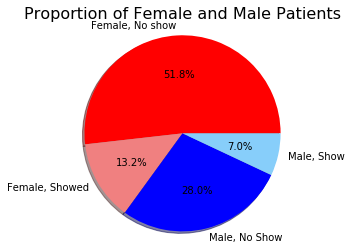

In [28]:
labels = 'Female, No show', 'Female, Showed', 'Male, No Show', 'Male, Show'
cut_points = [57245, 14594, 30962, 7725 ]
colors = ['red', 'lightcoral', 'blue', 'lightskyblue']

#Set piechart title and axis
fig1, ax = plt.subplots()
ax.pie(cut_points, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True)
plt.title('Proportion of Female and Male Patients', fontsize= 16)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

#plot piechart
plt.show()

**Answer:** By looking at the pie chart, approximately 1/5 of female patients- 13.2%/51.8% - showed up for appointments while approximately 1/4 of male patients- 7.0%/28.0%- showed up for appointments. Being a male influences one to show up to appointments more.

# Question 5: Is Scholarship from the government helping patients for good turnaround for physician visits?

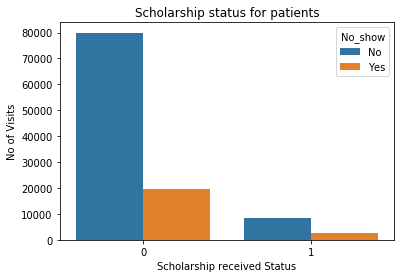

In [35]:
Scholarship = sns.countplot(x = 'Scholarship', hue = 'No_show', data = df)
Scholarship.set_title('Scholarship status for patients')
plt.xlabel('Scholarship received Status')
plt.ylabel('No of Visits')
plt.show()

**Answer:** We would expect that patients who have got scholarship should have been all attended the physician but it seems that ~25% of patients did not attend

# Question 6: Are the digital /social media reminders are helping the patients to take doctor's appointment?

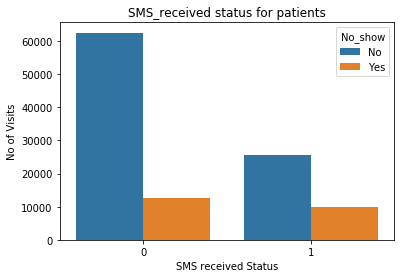

In [38]:
SMS_recieved = sns.countplot(x = 'SMS_received', hue = 'No_show', data = df)
SMS_recieved.set_title('SMS_received status for patients')
plt.xlabel('SMS received Status')
plt.ylabel('No of Visits')
plt.show()

# Question 7: Is there any Age difference in having a patient to be with status Show / No- Show?

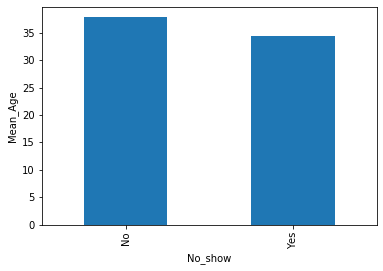

In [39]:
fig, ax = plt.subplots()
df.groupby('No_show')['Age'].mean().plot.bar()
plt.ylabel('Mean_Age');

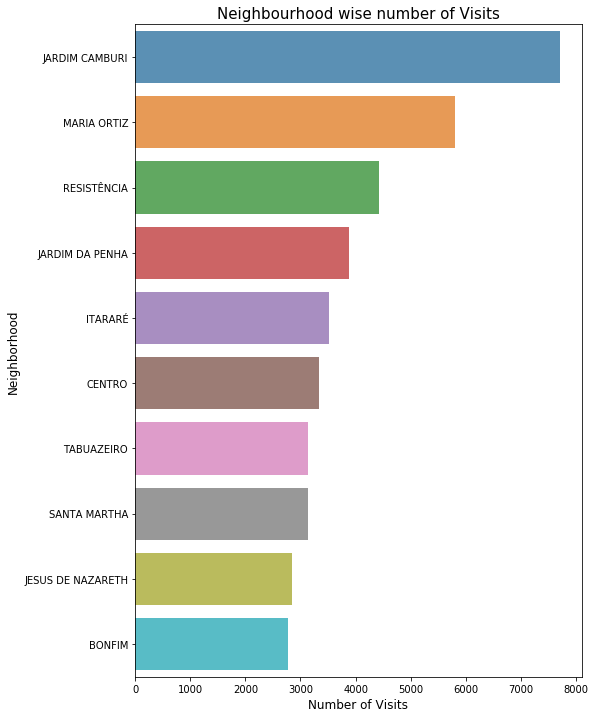

In [52]:
cnt_srs = df['Neighborhood'].value_counts().head(10)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Visits', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.title("Neighbourhood wise number of Visits", fontsize=15)
plt.show()

# <a id='conclusions'></a>
## Conclusions

> Alcoholism patients from Male group have showed up for physician visit when compared to female and they are in range from 45 to 65.
>Majority of the visits happend from Jardim Camburi, but we are not sure on why this happend. There might be many reasons like majority of the patient population might be from that place or majority of the physicians are from that location. This is one of the limitations

>Another limitation of the data set is that the SMS_received column does not indicate the wealth status of the patient. Some patients may not have enough money to pay for extra text message rates and some may find text messages from their doctors as annoying. Another variable that may prove to be more useful in determining whether a patient shows up to their appointments could be income level.

>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? To answer this question, we looked at three variable - alcoholism, scholarships, and SMS_received. We determined that SMS_received and scholarships did not influence patients in showing up for their appointment.

>If there are any promotions towards digital media either through SMS / emails, the conversion for physician visit will improve and from the data it is inferred that patients (~25K visits) who have recieved SMS have turned up for physician visit.

>On contrary actually we would expect that patients who have got scholarship should have been all attended the physician but it seems that ~25% of patients did not attend.

# Limitations
>The data contained only April, May and June data - If there are complete full year data on monthly basis, we can actually identify the traffic months for physicians appointments

>If we know the actual patient population from a particular neighborhood, then we can get a reason on why majority of the patients are coming from Jardim Camburi.
>If we had the data on how many SMS are sent to patient, we can actually find out that how many SMS reminders are required for a patient to get active for appointment.

>A limitation of the data set is seeing the value in the columns given. A limitation of the data set is that I did not see much value in the appointment_id, patient_id, or scheduled_day columns. Almost every row for that column was either the same or had a unique value for each row. Another limitation of the data set is that the SMS_received column does not indicate the wealth status of the patient.
>Some patients may not have enough money to pay for extra text message rates and some may find text messages from their doctors as annoying. Another variable that may prove to be more useful in determining whether a patient shows up to their appointments could be income level.

>If we would have got the disease severity of each patient, we can try and answer on why certain age group patients are having more visits compared to other age groups.

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295